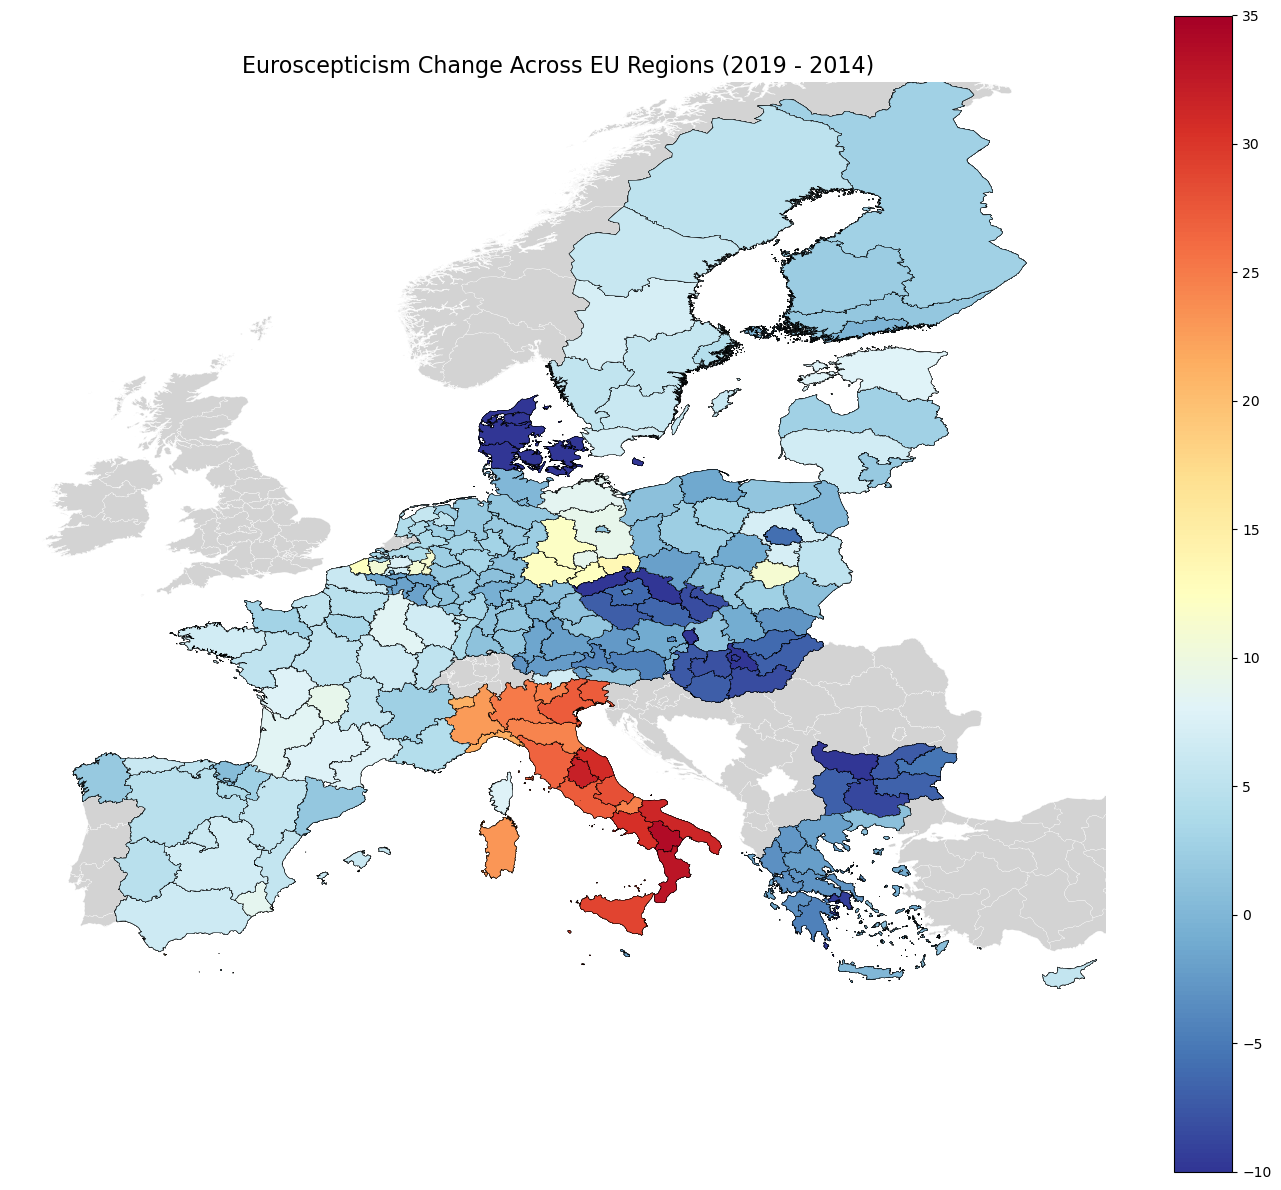

In [22]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
!pip install openpyxl
pivoted = pd.read_excel("HERE.xlsx")
nuts2_gdf = gpd.read_file("NUTS_RG_01M_2021_4326_LEVL_2.shp")
nuts2_gdf = nuts2_gdf[['NUTS_ID', 'geometry']]
nuts2_gdf.columns = ['group_id', 'geometry']
merged = nuts2_gdf.merge(pivoted[['group_id', 'euroscepticism_change']], on='group_id', how='left')
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
nuts2_gdf.plot(
    ax=ax,
    color='lightgray',
    edgecolor='white',
    linewidth=0.2
)
merged.dropna(subset=['euroscepticism_change']).plot(
    ax=ax,
    column='euroscepticism_change',
    cmap='RdYlBu_r',
    legend=True,
    edgecolor='black',
    linewidth=0.3,
    vmin=-10,  # minimum color scale value
    vmax=35
)
ax.set_xlim(-12, 35)
ax.set_ylim(30, 70)
ax.set_title("Euroscepticism Change Across EU Regions (2019 - 2014)", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

In [23]:
plt.savefig("euroscepticism_change_map.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

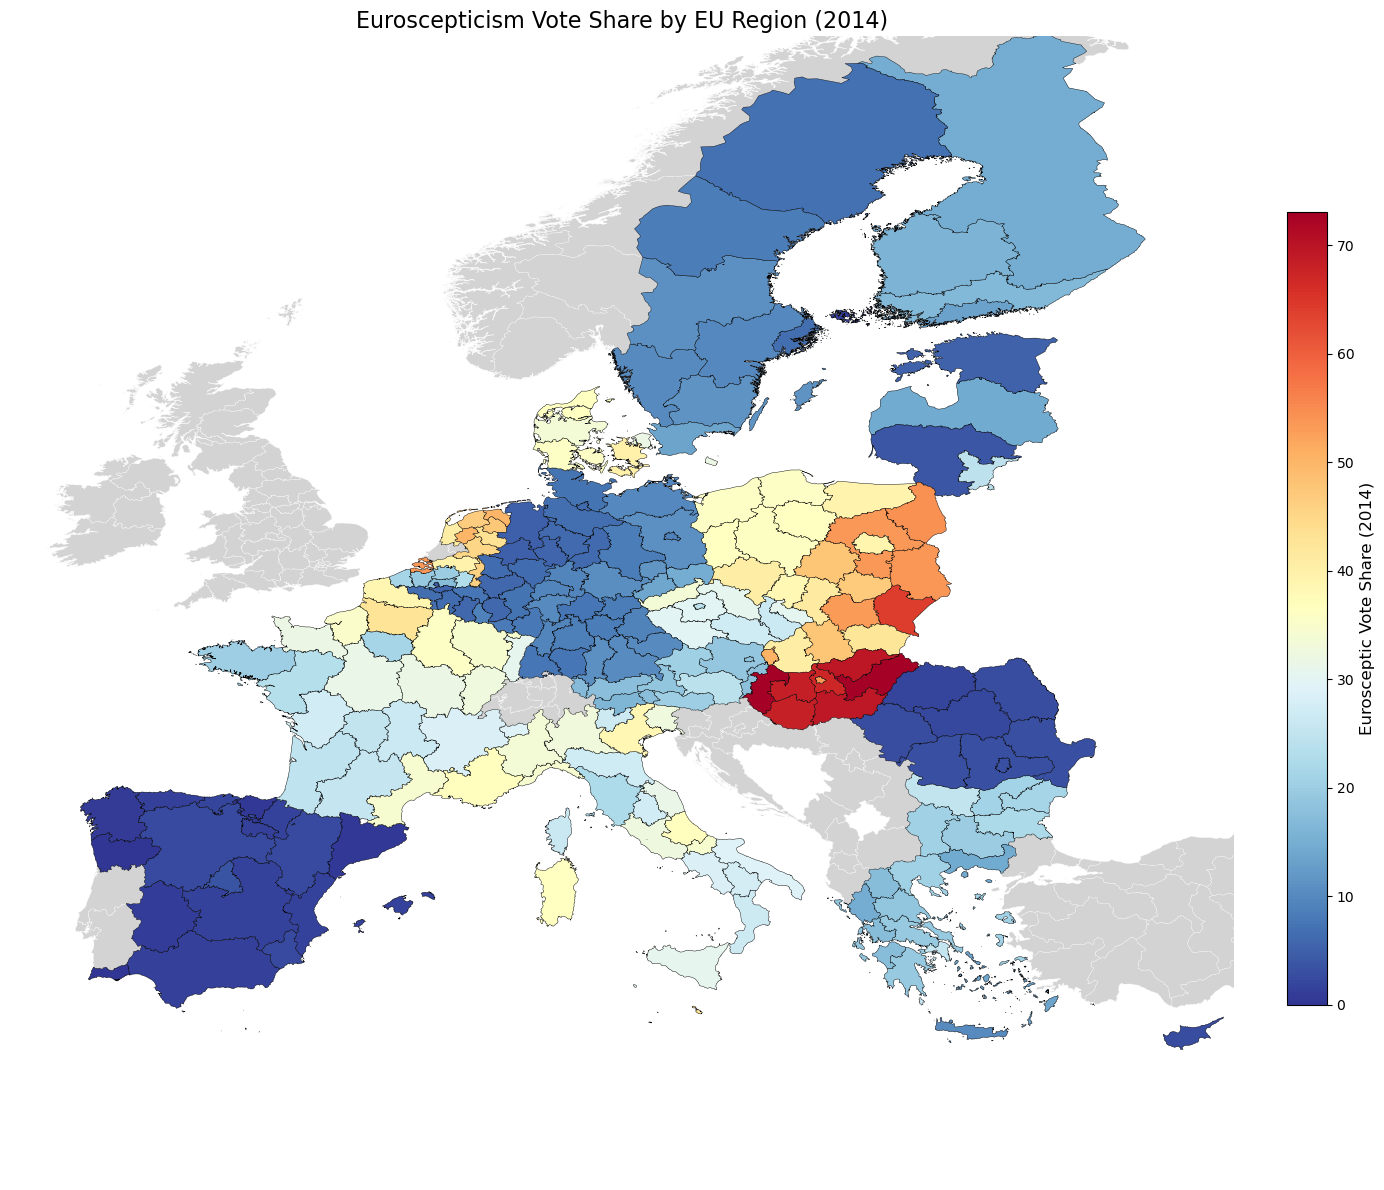

In [14]:
import matplotlib as mpl
df['eurosceptic_vote_share'] = pd.to_numeric(df['eurosceptic_vote_share'], errors='coerce')
# Filter only for 2014
df_2014 = df[df['year'] == 2014][['group_id', 'eurosceptic_vote_share']]
nuts2_gdf = gpd.read_file("NUTS_RG_01M_2021_4326_LEVL_2.shp")
nuts2_gdf = nuts2_gdf[['NUTS_ID', 'geometry']]
nuts2_gdf.columns = ['group_id', 'geometry']
merged = nuts2_gdf.merge(df_2014, on='group_id', how='left')
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
nuts2_gdf.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.2)
cmap = plt.cm.RdYlBu_r
vmin = merged['eurosceptic_vote_share'].min()
vmax = merged['eurosceptic_vote_share'].max()
merged.dropna(subset=['eurosceptic_vote_share']).plot(
    ax=ax,
    column='eurosceptic_vote_share',
    cmap=cmap,
    linewidth=0.3,
    edgecolor='black'
)
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # dummy array for scalar mappable
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Eurosceptic Vote Share (2014)', fontsize=12)
ax.set_xlim(-12, 35)
ax.set_ylim(30, 70)
ax.set_title("Euroscepticism Vote Share by EU Region (2014)", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

In [24]:
plt.savefig("euroscepticism_2014_map.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

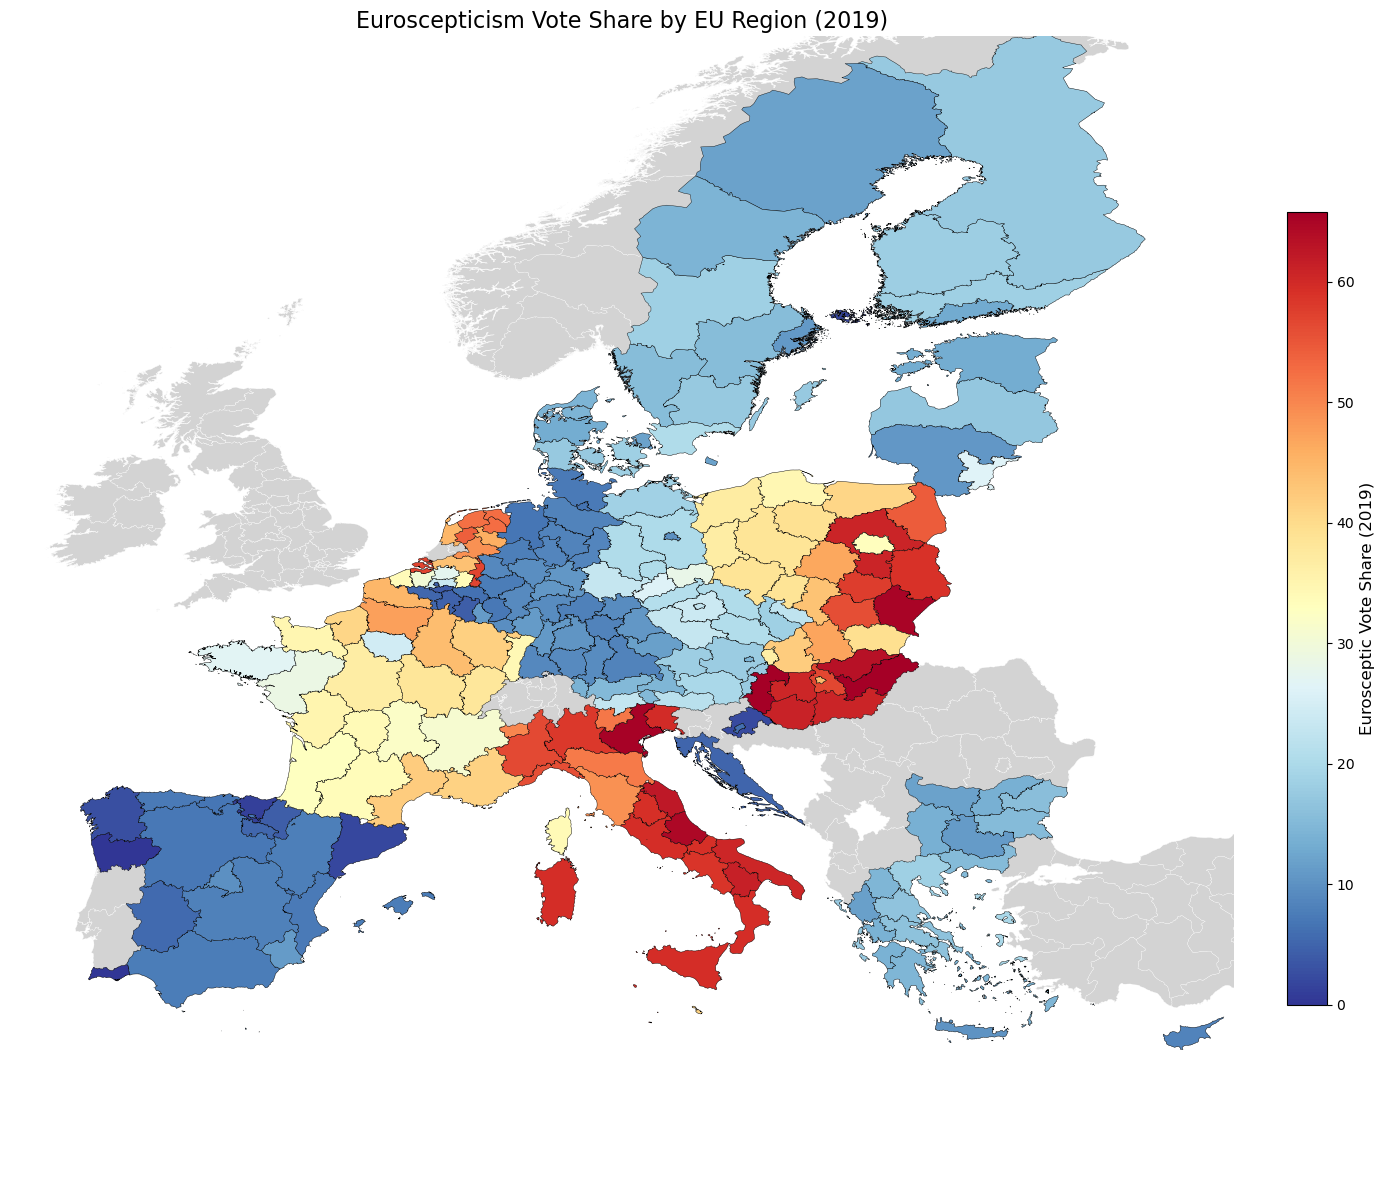

In [16]:
df_2019 = df[df['year'] == 2019][['group_id', 'eurosceptic_vote_share']]
nuts2_gdf = gpd.read_file("NUTS_RG_01M_2021_4326_LEVL_2.shp")
nuts2_gdf = nuts2_gdf[['NUTS_ID', 'geometry']]
nuts2_gdf.columns = ['group_id', 'geometry']
merged = nuts2_gdf.merge(df_2019, on='group_id', how='left')
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
nuts2_gdf.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.2)
cmap = plt.cm.RdYlBu_r
vmin = merged['eurosceptic_vote_share'].min()
vmax = merged['eurosceptic_vote_share'].max()
merged.dropna(subset=['eurosceptic_vote_share']).plot(
    ax=ax,
    column='eurosceptic_vote_share',
    cmap=cmap,
    linewidth=0.3,
    edgecolor='black'
)
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # dummy array for scalar mappable
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Eurosceptic Vote Share (2019)', fontsize=12)
ax.set_xlim(-12, 35)
ax.set_ylim(30, 70)
ax.set_title("Euroscepticism Vote Share by EU Region (2019)", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

In [25]:
plt.savefig("euroscepticism_2019_map.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>